In [ ]:
import timm
import torch
from  torch import nn
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
m = timm.create_model('resnet50d', pretrained=False, in_chans = 1)
x =torch.randn(1, 1, 224, 224)
m(x).shape

torch.Size([1, 1000])

In [ ]:
m.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
m.get_classifier()

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
timm.create_model('resnet50d', pretrained=False, num_classes=10).get_classifier()

Linear(in_features=2048, out_features=10, bias=True)

In [ ]:
timm.create_model('resnet50d', pretrained=False, num_classes=0).get_classifier()

Identity()

In [ ]:
m.global_pool

SelectAdaptivePool2d (pool_type=avg, flatten=Flatten(start_dim=1, end_dim=-1))

In [ ]:
pool_types = ['avg', 'max', 'avgmax', 'catavgmax', '']

for pool in pool_types:
    model = timm.create_model('resnet50d', pretrained=True, num_classes=0, global_pool=pool)
    model.eval()
    feature_output = model(torch.rand(1, 3, 224, 224))
    print(feature_output.shape)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to C:\Users\zc199/.cache\torch\hub\checkpoints\resnet50d_ra2-464e36ba.pth


torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 4096])
torch.Size([1, 2048, 7, 7])


In [ ]:
m = timm.create_model('resnet50d', pretrained=True)
print('Original pooling: {}'.format(m.global_pool))
print('Original classifier: {}'.format(m.get_classifier()))
print('----------------')

m.reset_classifier(10, 'max')
print('Original pooling: {}'.format(m.global_pool))
print('Original classifier: {}'.format(m.get_classifier()))

Original pooling: SelectAdaptivePool2d (pool_type=avg, flatten=Flatten(start_dim=1, end_dim=-1))
Original classifier: Linear(in_features=2048, out_features=1000, bias=True)
----------------
Original pooling: SelectAdaptivePool2d (pool_type=max, flatten=Flatten(start_dim=1, end_dim=-1))
Original classifier: Linear(in_features=2048, out_features=10, bias=True)


In [ ]:
model = timm.create_model('resnet50d', pretrained=True, num_classes=10, global_pool='catavgmax')
num_in_features = model.get_classifier().in_features; num_in_features

4096

In [ ]:
model.fc = nn.Sequential(
    nn.BatchNorm1d(num_in_features),
    nn.Linear(in_features=num_in_features, out_features=512, bias=True),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(in_features=512, out_features=10, bias=False)   
)

In [ ]:
model.eval()
model(torch.randn(1, 3, 224, 224)).shape



torch.Size([1, 10])

# Feature Extraction

In [ ]:
pets_image_paths = glob.glob('D:/Data/Oxford-IIIT/images/*')

In [ ]:
image = Image.open(pets_image_paths[0])

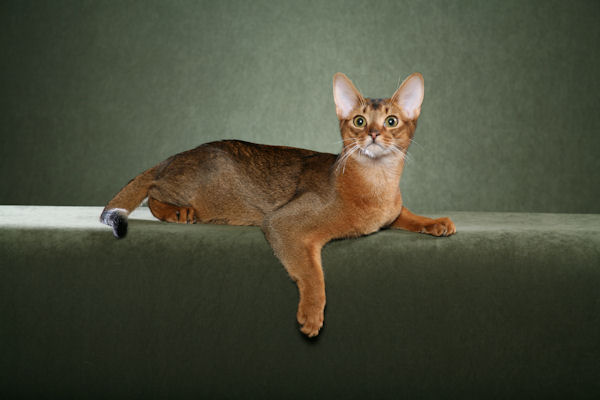

In [ ]:
image

In [ ]:
image = torch.as_tensor(np.array(image, dtype=np.float32)).transpose(2,0)[None]; image.shape

torch.Size([1, 3, 600, 400])

In [ ]:
model = timm.create_model('resnet50d', pretrained=True)
model.default_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth',
 'num_classes': 1000,
 'input_size': (3, 224, 224),
 'pool_size': (7, 7),
 'crop_pct': 0.875,
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'first_conv': 'conv1.0',
 'classifier': 'fc',
 'architecture': 'resnet50d'}

In [ ]:
# final feature map
feature_output = model.forward_features(image); feature_output.shape

torch.Size([1, 2048, 19, 13])

In [ ]:
def visualise_feature_output(t):
    plt.imshow(t[0].transpose(0,2).sum(-1).detach().numpy())
    plt.show()

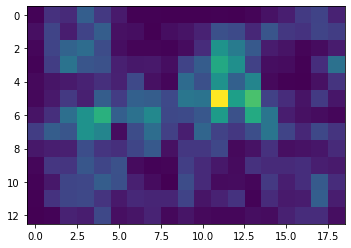

In [ ]:
visualise_feature_output(feature_output)

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, features_only=True)

In [ ]:
model.feature_info.module_name()

['act1', 'layer1', 'layer2', 'layer3', 'layer4']

In [ ]:
model.feature_info.channels()

[64, 256, 512, 1024, 2048]

In [ ]:
out = model(image)
for o in out:
    print(o.shape)

torch.Size([1, 64, 300, 200])
torch.Size([1, 256, 150, 100])
torch.Size([1, 512, 75, 50])
torch.Size([1, 1024, 38, 25])
torch.Size([1, 2048, 19, 13])


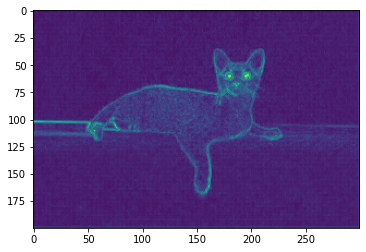

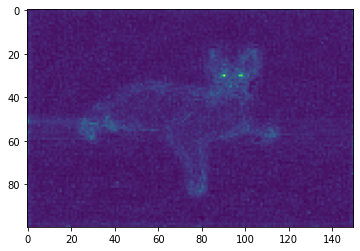

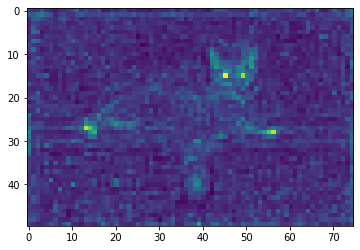

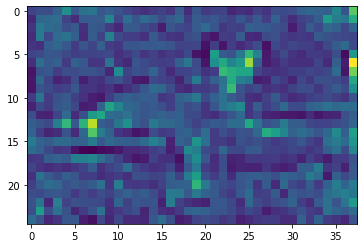

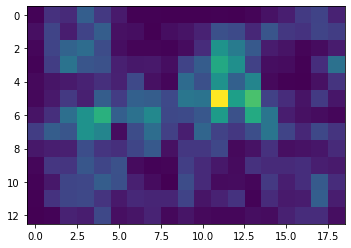

In [ ]:
for o in out:
    plt.imshow(o[0].transpose(0, 2).sum(-1).detach().numpy())
    plt.show()

# TorchVision

In [ ]:
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, exportable=True)

In [ ]:
nodes, _ =get_graph_node_names(model)

In [ ]:
nodes

['x',
 'conv1.0',
 'conv1.1',
 'conv1.2',
 'conv1.3',
 'conv1.4',
 'conv1.5',
 'conv1.6',
 'bn1',
 'act1',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.act1',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.act2',
 'layer1.0.conv3',
 'layer1.0.bn3',
 'layer1.0.downsample.0',
 'layer1.0.downsample.1',
 'layer1.0.downsample.2',
 'layer1.0.add',
 'layer1.0.act3',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.act1',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.act2',
 'layer1.1.conv3',
 'layer1.1.bn3',
 'layer1.1.add',
 'layer1.1.act3',
 'layer1.2.conv1',
 'layer1.2.bn1',
 'layer1.2.act1',
 'layer1.2.conv2',
 'layer1.2.bn2',
 'layer1.2.act2',
 'layer1.2.conv3',
 'layer1.2.bn3',
 'layer1.2.add',
 'layer1.2.act3',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.act1',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.act2',
 'layer2.0.conv3',
 'layer2.0.bn3',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.0.downsample.2',
 'layer2.0.add',
 'layer2.0.act3',
 'layer2.

In [ ]:
features = {'layer1.0.act2': 'out'}
feature_extractor = create_feature_extractor(model, return_nodes=features)

In [ ]:
out = feature_extractor(image)

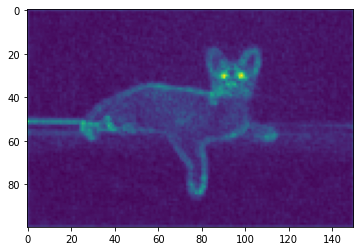

In [ ]:
visualise_feature_output(out['out'])

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, scriptable=True)
model.eval()

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Co

In [ ]:
scripted_model = torch.jit.script(model)

In [ ]:
scripted_model(torch.randn(8,3,224,224)).shape

torch.Size([8, 1000])

# Data

In [ ]:
folder = "D:\Data\COVID_QU\Infection Segmentation Data\Infection Segmentation Data\Train"

In [ ]:
root_l = []
subdirs_l = []
files_l = []
for root, subdirs, files in os.walk(folder, topdown=False):
    root_l.append(root)
    subdirs_l.append(subdirs)
    files_l.append(files)

In [ ]:
root_l

['D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\COVID-19\\images',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\COVID-19\\infection masks',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\COVID-19\\lung masks',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\COVID-19',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\Non-COVID\\images',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\Non-COVID\\infection masks',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\Non-COVID\\lung masks',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\Non-COVID',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\Normal\\images',
 'D:\\Data\\COVID_QU\\Infection Se

In [ ]:
rel_path = os.path.relpath(root_l[3], folder)
rel_path_split = rel_path.split(os.path.sep)

In [ ]:
IMG_EXTENSIONS = ['.png', '.jpg', '.jpeg']
def load_images_and_masks(folder, types=IMG_EXTENSIONS, class_to_idx=None, sort=True):
    labels = []
    image_names = []
    lung_mask_names = []
    infection_mask_names = []
    
    for root, subdirs, files in os.walk(folder, topdown=False):
        rel_path = os.path.relpath(root, folder) if (root != folder) else ''
        rel_path_split = rel_path.split(os.path.sep)
        if len(rel_path_split) == 2:
            label = rel_path_split[-2]
            for f in files:
                base, ext = os.path.splitext(f)
                if ext.lower() in types:
                    if rel_path_split[-1] == 'images':
                        image_names.append(os.path  .join(root, f))
                        labels.append(label)
                    
    if class_to_idx is None:
        # building class index
        unique_labels = set(labels)
        sorted_labels = list(sorted(unique_labels, key=natural_key))
        class_to_idx = {c: idx for idx, c in enumerate(sorted_labels)}
    images_and_targets = [(f, class_to_idx[l]) for f, l in zip(image_names, labels) if l in class_to_idx]
    if sort:
        images_and_targets = sorted(images_and_targets, key=lambda k: natural_key(k[0]))
    return images_and_targets, class_to_idx
                

In [ ]:
import re
def natural_key(string_):
    """See http://www.codinghorror.com/blog/archives/001018.html"""
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_.lower())]

In [ ]:
a, b = load_images_and_masks("D:\Data\COVID_QU\Lung Segmentation Data\Lung Segmentation Data\Train")

In [ ]:
len(a)

21715

In [ ]:
a = 'L'
image = Image.open(pets_image_paths[0]).convert(a)

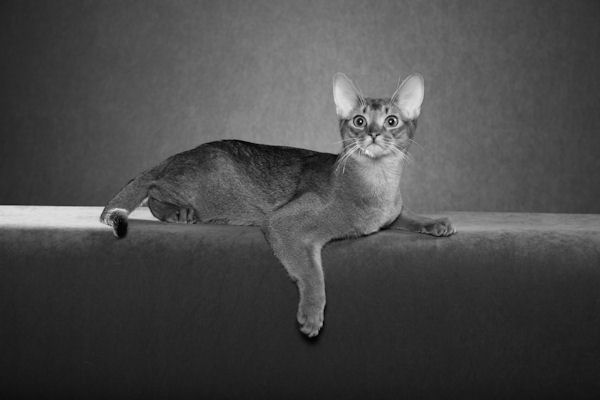

In [ ]:
image

In [ ]:
np.array(image).shape

(400, 600)

In [ ]:
from itertools import repeat

def expand_to_chs(x, n):
    if not isinstance(x, (tuple, list)):
        x = tuple(repeat(x, n))
    elif len(x) == 1:
        x = x * n
    else:
        assert len(x) == n, 'normalization stats must match image channels'
    return x


In [ ]:
IMAGENET_DEFAULT_MEAN = (0.485, 0.456, 0.406)
IMAGENET_DEFAULT_STD = (0.229, 0.224, 0.225)
mean = IMAGENET_DEFAULT_MEAN

In [5]:
!pip install timm

     |████████████████████████████████| 431 kB 5.3 MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/tokenlabeling_covid')


In [3]:
from utils import get_mean_and_std

In [6]:
from data import CovidQu

In [12]:
root = '/content/drive/MyDrive/covid_attention/COVID_QU/Lung Segmentation Data/Lung Segmentation Data/Train'

In [15]:
import torchvision

In [16]:
from torch.torch_version import TorchVersion
dataset = CovidQu(root, greyscale=True, transform=torchvision.transforms.ToTensor())

In [18]:
len(dataset)

21715

In [21]:
import torch
def get_mean_and_std(dataset):
    '''Compute the mean and std value of dataset.'''
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
    mean = torch.zeros(1)
    std = torch.zeros(1)
    print('==> Computing mean and std..')
    for inputs, targets in dataloader:
        for i in range(1):
            mean[i] += inputs[:,i,:,:].mean()
            std[i] += inputs[:,i,:,:].std()
    mean.div_(len(dataset))
    std.div_(len(dataset))
    return mean, std

In [22]:
get_mean_and_std(dataset)

==> Computing mean and std..


(tensor([0.5128]), tensor([0.2236]))